In [21]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

In [2]:
def change_col_types(df):
    numcols_to_change = df.columns
    for col in numcols_to_change:
        try:
            df[col] = df[col].astype(float)
        except:
            continue

In [27]:
url = f"https://www.espn.com/mens-college-basketball/team/stats/_/id/2540"
info = pd.read_html(url)
names = pd.DataFrame(info[2])
stats = pd.DataFrame(info[3])
df = pd.concat([names, stats], axis = 1)

In [28]:
df["points/min"] = (df["PTS"] / df["MIN"]).apply(lambda x: round(x, 2))
df["rebounds/min"] = (df["REB"] / df["MIN"]).apply(lambda x: round(x, 2))
df["assists/min"] = (df["AST"] / df["MIN"]).apply(lambda x: round(x, 2))
df["blocks/min"] = (df["BLK"] / df["MIN"]).apply(lambda x: round(x, 2))
df["steals/min"] = (df["STL"] / df["MIN"]).apply(lambda x: round(x, 2))
df["turnovers/min"] = (df["TO"] / df["MIN"]).apply(lambda x: round(x,2))
df['offensive_reb/min'] = (df["OR"] / df["MIN"]).apply(lambda x: round(x, 2))
df['defensive_reb/min'] = (df["DR"] / df["MIN"]).apply(lambda x: round(x, 2))
df['FTA/min'] = (df["FTA"] / df["MIN"]).apply(lambda x: round(x, 2))
df['3PA/min'] = (df["3PA"] / df["MIN"]).apply(lambda x: round(x, 2))

In [29]:
df.head()

,Name,MIN,FGM,FGA,FTM,FTA,3PM,3PA,PTS,OR,DR,REB,AST,TO,STL,BLK,points/min,rebounds/min,assists/min,blocks/min,steals/min,turnovers/min,offensive_reb/min,defensive_reb/min,FTA/min,3PA/min
0,Amadou Sow F,832.0,180,319,68,89,10,33,438,83,152,235,20,55,21,23,0.53,0.28,0.02,0.03,0.03,0.07,0.10,0.18,0.11,0.04
1,Ajay Mitchell G,866.0,112,211,72,96,16,49,312,4,56,60,101,48,22,6,0.36,0.07,0.12,0.01,0.03,0.06,0.00,0.06,0.11,0.06
2,Miles Norris F,823.0,101,226,50,63,37,104,289,40,117,157,35,47,23,18,0.35,0.19,0.04,0.02,0.03,0.06,0.05,0.14,0.08,0.13
3,Ajare Sanni G,583.0,71,201,53,67,29,91,224,7,52,59,64,31,23,0,0.38,0.10,0.11,0.00,0.04,0.05,0.01,0.09,0.11,0.16
4,Josh Pierre-Louis G,662.0,88,160,47,82,5,28,228,27,80,107,81,66,32,1,0.34,0.16,0.12,0.00,0.05,0.10,0.04,0.12,0.12,0.04


AttributeError: 'BarContainer' object has no attribute 'sort_values'

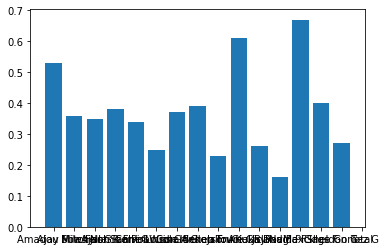

In [34]:
plt.bar(df['Name'], df['points/min']).sort_values()

In [35]:
df['points/min'].sort_values(ascending = False)

11    0.16
8     0.23
5     0.25
10    0.26
14    0.27
4     0.34
2     0.35
1     0.36
6     0.37
3     0.38
7     0.39
13    0.40
0     0.53
9     0.61
12    0.67
15     NaN
Name: points/min, dtype: float64

In [25]:
df.set_index("Name", inplace=True)